## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
print(num_mice)

249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint"])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [59]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = combined_data.loc[combined_data["Mouse ID"] == "g989"]
dup_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop(index=dup_mouse.index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [61]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_df['Mouse ID'].nunique()
mice_count

248

## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Initialize lists
regimens = clean_df["Drug Regimen"].unique()
mean_vol = []
median_vol = []
var_vol = []
std_vol = []
sems = []

# Iterate through the different treatments to calculate the summary statistics
for regimen in regimens:
    regimen_df = clean_df[clean_df["Drug Regimen"]==regimen]
    mean_vol.append(clean_df["Tumor Volume (mm3)"].mean())
    median_vol.append(clean_df["Tumor Volume (mm3)"].median())
    var_vol.append(np.var(clean_df["Tumor Volume (mm3)"],ddof=0))
    std_vol.append(np.std(clean_df["Tumor Volume (mm3)"],ddof=0))
    sems.append(st.sem(clean_df["Tumor Volume (mm3)"]))

# Create a dataframe for the summary statistics
summ_stats_df = pd.DataFrame({
    "Drug Regimen":regimens,
    "Mean Volume": mean_vol,
    "Median Volume": median_vol,
    "Variance": var_vol,
    "Standard Deviation": std_vol,
    "Standard Error": sems
})

summ_stats_df

,Drug Regimen,Mean Volume,Median Volume,Variance,Standard Deviation,Standard Error
0,Ramicane,50.435293,48.933454,79.42064,8.911826,0.205591
1,Capomulin,50.435293,48.933454,79.42064,8.911826,0.205591
2,Infubinol,50.435293,48.933454,79.42064,8.911826,0.205591
3,Placebo,50.435293,48.933454,79.42064,8.911826,0.205591
4,Ceftamin,50.435293,48.933454,79.42064,8.911826,0.205591
5,Stelasyn,50.435293,48.933454,79.42064,8.911826,0.205591
6,Zoniferol,50.435293,48.933454,79.42064,8.911826,0.205591
7,Ketapril,50.435293,48.933454,79.42064,8.911826,0.205591
8,Propriva,50.435293,48.933454,79.42064,8.911826,0.205591
9,Naftisol,50.435293,48.933454,79.42064,8.911826,0.205591


In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_df = clean_df.groupby(['Drug Regimen'])

# Use the grouped object to calculate the summary statistics
mean_vol = regimen_df["Tumor Volume (mm3)"].mean()
median_vol = regimen_df["Tumor Volume (mm3)"].median()
var_vol = regimen_df["Tumor Volume (mm3)"].var(ddof=0)
std_vol = regimen_df["Tumor Volume (mm3)"].std(ddof=0)
sems = regimen_df["Tumor Volume (mm3)"].sem()

# Create a dataframe for the summary statistics
summ_stats_df = pd.DataFrame({
    "Mean Volume": mean_vol,
    "Median Volume": median_vol,
    "Variance": var_vol,
    "Standard Deviation": std_vol,
    "Standard Error": sems
})

summ_stats_df

,Mean Volume,Median Volume,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


## Bar and Pie Charts

In [64]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen = regimen_df['Drug Regimen'].unique()
drug_regimen

# Create a dataframe indexed by drug treatment with pandas bar plotting
regimen_count = regimen_df['Mouse ID'].count()
regimen_count.index

regimen_count.values


array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182])

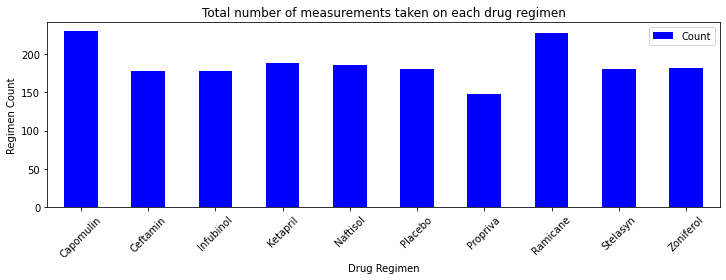

In [65]:
regimen_by_count_df = pd.DataFrame({ 
  'Count':regimen_count 
}) 

regimen_by_count_df.plot(kind='bar',figsize=(10,4),rot=45,width=0.5, color='b')
plt.title("Total number of measurements taken on each drug regimen")
plt.tight_layout()
plt.ylabel("Regimen Count")
 
# Save the figure
plt.savefig("Figures/PandasBarChart.png") 
plt.show()


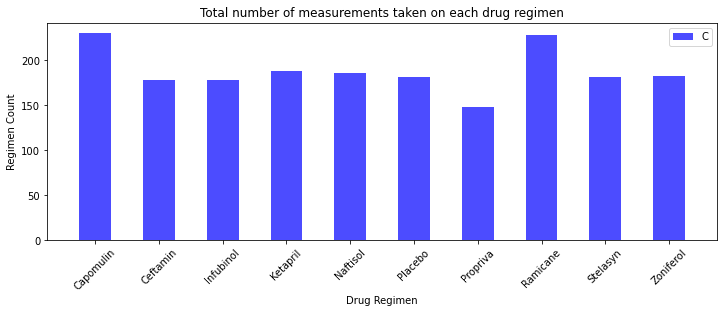

In [66]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.figure(figsize=(12,4))
plt.bar(regimen_count.index.values, regimen_count.values, alpha=0.7, align="center", color='b', width=0.5)
plt.xticks(rotation=45)
plt.title("Total number of measurements taken on each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Regimen Count")
plt.xlim(-0.75,len(regimens)-0.25)
plt.ylim(0, max(regimen_count)*1.05)
plt.legend("Count")

# Save the figure
plt.savefig("Figures/PyplotBarChart.png")
plt.show()


In [67]:
# Create dataframe showing counts of mice by sex
sex_df = clean_df.groupby(['Sex'])
sex_count = sex_df['Sex'].count()
sex_count.head()

Sex
Female    922
Male      958
Name: Sex, dtype: int64

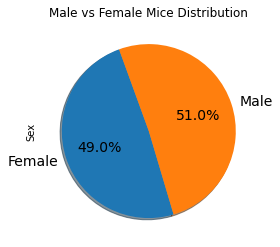

<Figure size 432x288 with 0 Axes>

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders = sex_count.index.values

sex_count.plot(kind='pie', title="Male vs Female Mice Distribution", autopct='%1.1f%%', startangle= 110,shadow=True, fontsize=14,legend =False)
plt.show()

# Save the figure
plt.savefig("Figures/PandasPieChart.png")


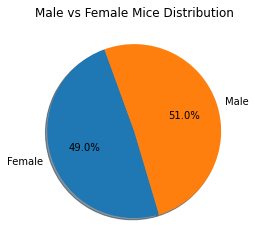

<Figure size 432x288 with 0 Axes>

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_count, labels=genders, autopct="%1.1f%%", shadow=True, startangle=110)
plt.title("Male vs Female Mice Distribution")
plt.show()

# Save the figure
plt.savefig("Figures/PyplotPieChart.png")

## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_id = clean_df.groupby(["Mouse ID"])
last_tp = mouse_id.last()
last_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [71]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset  
for treatment in treatments:
    temp_df = last_tp.loc[last_tp["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
    
    tumor_vol_data.append(temp_df)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles =  temp_df.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]

    # Determine outliers using upper and lower bounds    
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{treatment} potential outliers: {temp_df[(temp_df < lower_bound) | (temp_df > upper_bound)]}")



Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [72]:
last_tp


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


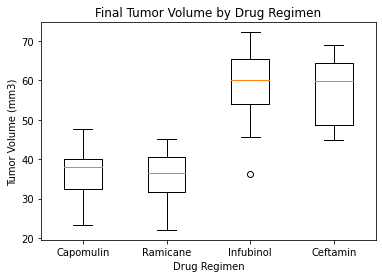

In [73]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_data)
plt.xticks([1,2,3,4],treatments)

# Save the figure
plt.savefig("Figures/BoxWhiskerPlot.png")
plt.show()


## Line and Scatter Plots

In [74]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
